<a href="https://colab.research.google.com/github/josephychin/forest-fires/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 - Part 4

Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to continue modeling with your data (or begin if you did not start this last week). Make sure you are validating your model and determining which evaluation metrics are best to evaluate your model.

Commit your data and any work you do to your GitHub repository.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
X = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'X', 'Y']]

In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [11]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
df['cluster'] = kmeans.labels_

In [13]:
df['cluster'].value_counts()

1    204
2    125
0    108
4     79
3      1
Name: cluster, dtype: int64

In [14]:
seg1 = df[df['cluster'] == 0]
seg2 = df[df['cluster'] == 1]
seg3 = df[df['cluster'] == 2]
seg4 = df[df['cluster'] == 3]
seg5 = df[df['cluster'] == 4]

In [15]:
fire_segs = [seg1, seg2, seg3, seg4, seg5]
for segment in fire_segs:
  print(segment.describe().T)

         count        mean         std   min     25%    50%       75%     max
X        108.0    4.870370    1.788293   1.0   4.000   5.00    6.0000    9.00
Y        108.0    4.481481    1.171958   2.0   4.000   4.00    5.0000    9.00
FFMC     108.0   85.462037    9.739051  18.7  84.675  87.60   90.7250   94.00
DMC      108.0   30.262037   20.888935   1.1  15.075  25.95   40.2500   96.20
DC       108.0  126.425926  144.829501   7.9  45.925  80.80  103.8000  706.60
ISI      108.0    5.430556    3.133284   0.0   2.800   5.00    7.8000   12.50
temp     108.0   11.912963    4.570529   2.2   8.600  12.25   15.2000   23.30
RH       108.0   46.555556   19.853827  18.0  29.750  43.00   59.0000  100.00
wind     108.0    4.798148    2.096815   0.9   3.100   4.90    5.8000    9.40
rain     108.0    0.001852    0.019245   0.0   0.000   0.00    0.0000    0.20
area     108.0    5.679537   11.065593   0.0   0.000   0.00    6.9275   61.13
cluster  108.0    0.000000    0.000000   0.0   0.000   0.00    0

In [16]:
temp_means = [np.mean(segment['temp']) for segment in fire_segs]
X_means = [np.mean(segment['X']) for segment in fire_segs]
Y_means = [np.mean(segment['Y']) for segment in fire_segs]
ffmc_means = [np.mean(segment['FFMC']) for segment in fire_segs]
dmc_means = [np.mean(segment['DMC']) for segment in fire_segs]
wind_means = [np.mean(segment['wind']) for segment in fire_segs]
rain_means = [np.mean(segment['rain']) for segment in fire_segs]

In [17]:
summary_df = pd.DataFrame({'Fire Segment': ['seg1', 'seg2', 'seg3', 'seg4', 'seg5'], 'Temp Means': temp_means,'X Means': X_means, 'Y Means': Y_means, 'FFMC Means': ffmc_means, 'DMC Means': dmc_means, 'Wind Means': wind_means, 'Rain Means': rain_means})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean Temperature for each Fire Segment')

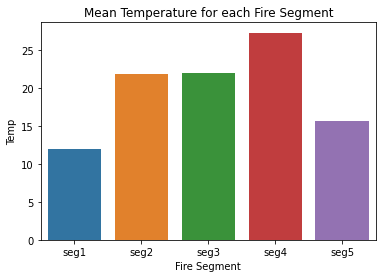

In [18]:
sns.barplot(summary_df['Fire Segment'], summary_df['Temp Means'])
plt.ylabel('Temp')
plt.title('Mean Temperature for each Fire Segment')

Text(0.5, 1.0, 'Mean X for each Fire Segment')

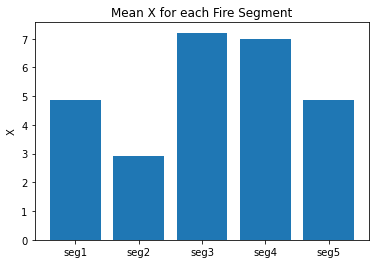

In [19]:
plt.bar(summary_df['Fire Segment'], summary_df['X Means'])
plt.ylabel('X')
plt.title('Mean X for each Fire Segment')

Text(0.5, 1.0, 'Mean Fine Fuel Moisture Code for each Fire Segment')

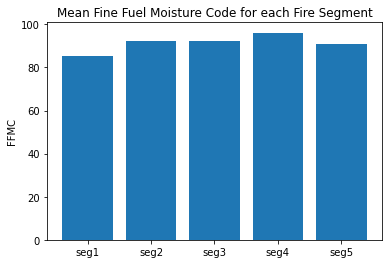

In [20]:
plt.bar(summary_df['Fire Segment'], summary_df['FFMC Means'])
plt.ylabel('FFMC')
plt.title('Mean Fine Fuel Moisture Code for each Fire Segment')

Text(0.5, 1.0, 'Mean Wind for each Fire Segment')

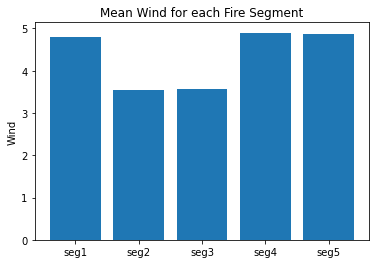

In [21]:
plt.bar(summary_df['Fire Segment'], summary_df['Wind Means'])
plt.ylabel('Wind')
plt.title('Mean Wind for each Fire Segment')

In [22]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [23]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,cluster
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,2
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [24]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

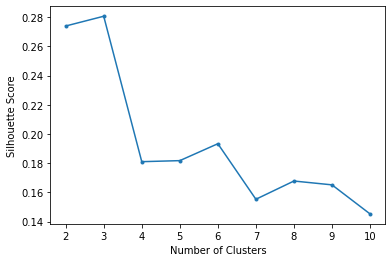

In [25]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [38]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
df['kmeans_cluster'] = kmeans.labels_